In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [23]:
import keras
model = Sequential()
# Select 6 feature convolution kernels with a size of 5 * 5 (without offset), and get 66 feature maps. The size of each feature map is 32−5 + 1 = 2832−5 + 1 = 28.
# That is, the number of neurons has been reduced from 10241024 to 28 ∗ 28 = 784 28 ∗ 28 = 784.
# Parameters between input layer and C1 layer: 6 ∗ (5 ∗ 5 + 1)
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 3)))
# The input of this layer is the output of the first layer, which is a 28 * 28 * 6 node matrix.
# The size of the filter used in this layer is 2 * 2, and the step length and width are both 2, so the output matrix size of this layer is 14 * 14 * 6.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 14 * 14 * 6, the filter size used is 5 * 5, and the depth is 16. This layer does not use all 0 padding, and the step size is 1.
# The output matrix size of this layer is 10 * 10 * 16. This layer has 5 * 5 * 6 * 16 + 16 = 2416 parameters
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The input matrix size of this layer is 10 * 10 * 16. The size of the filter used in this layer is 2 * 2, and the length and width steps are both 2, so the output matrix size of this layer is 5 * 5 * 16.
model.add(MaxPooling2D(pool_size=(2, 2)))
# The input matrix size of this layer is 5 * 5 * 16. This layer is called a convolution layer in the LeNet-5 paper, but because the size of the filter is 5 * 5, #
# So it is not different from the fully connected layer. If the nodes in the 5 * 5 * 16 matrix are pulled into a vector, then this layer is the same as the fully connected layer.
# The number of output nodes in this layer is 120, with a total of 5 * 5 * 16 * 120 + 120 = 48120 parameters.
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# The number of input nodes in this layer is 120 and the number of output nodes is 84. The total parameter is 120 * 84 + 84 = 10164 (w + b)
model.add(Dense(84, activation='relu'))
# The number of input nodes in this layer is 84 and the number of output nodes is 10. The total parameter is 84 * 10 + 10 = 850
model.add(Dense(3, activation='softmax'))
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               324600    
_________________________________________________________________
dense_19 (Dense)             (None, 84)               

In [24]:
#classifier=Sequential()
#classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Flatten())
#classifier.add(Dense(units = 128, activation = 'relu'))
#classifier.add(Dense(units = 1, activation = 'sigmoid'))
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/home/rahul/Downloads/dlcvnlp/cnn/dogcat_new/familyimage',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 )

test_set = test_datagen.flow_from_directory('/home/rahul/Downloads/dlcvnlp/cnn/dogcat_new/familyimage',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            )
training_set.class_indices

Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


{'anna': 0, 'lion': 1, 'rahul': 2}

In [29]:
model.fit_generator(training_set,
                         steps_per_epoch = 10,
                         epochs = 10,
                         validation_data = test_set,    
                         validation_steps = 5)

Epoch 1/10
 1/10 [==>...........................] - 6s 6s/step - loss: 1.0182 - accuracy: 0.4333 - val_loss: 0.9483 - val_accuracy: 0.6667


In [27]:
model.save('familyclassifierlenet.h5')
print('model saved perfetely')

model saved perfetely


In [2]:
from keras.models import load_model
model=load_model('family.h5')

In [3]:

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cat.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
model.predict(test_image)

array([[0., 1., 0.]], dtype=float32)

In [4]:
result = model.predict(test_image)
result[0][1]

1.0

In [5]:
result = model.predict(test_image)
#training_set.class_indices
if result[0][0] == 1:
    prediction = 'anna'
    print(prediction)
if result[0][1]==1:
    prediction = 'lion'
    print(prediction)
if result[0][2]==1:
    prediction = 'rahul'
    print(prediction)

lion


In [4]:
import numpy as np

arr=np.load('kernel2')
np.load('kernel2')

array([[ 0.00105764, -0.00880577,  0.00093404, ...,  0.01784571,
         0.02458656, -0.01145518],
       [ 0.00803579,  0.00040948,  0.03814964, ..., -0.01068632,
         0.01159416, -0.01381535],
       [-0.01043297, -0.0050548 , -0.0027501 , ...,  0.00611266,
        -0.00395225, -0.01332013],
       ...,
       [-0.00153706, -0.01686208, -0.01664875, ...,  0.0128532 ,
         0.00140878, -0.009665  ],
       [ 0.00134002,  0.01006551, -0.01493653, ...,  0.0124953 ,
        -0.01755188, -0.00044704],
       [-0.01642971, -0.0039025 , -0.00834517, ...,  0.01643898,
         0.02179885, -0.00853191]], dtype=float32)

TypeError: Invalid shape (128,) for image data

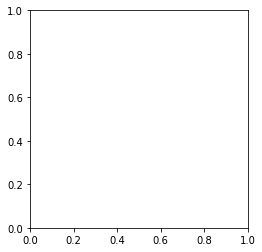

In [5]:
import matplotlib.pyplot as plt
plt.imshow(arr[0],cmap='gray')
plt.show()